# Web Scraping + Data Cleaning + EDA + Visualization

###  **Using pandas read_html to Web Scrape Data for Data Science** 

### Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [1]:
# The Building Blocks
year = '2019'
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

# Combining the URL + year strings together
url = str.format(year)
url

'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

Now, let's programmatically return a list of URL given a list of years (e.g. 2015,2016,2017,2018,2019).

In [2]:
years = [2015,2016,2017,2018,2019]
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
  url = str.format(year)
  print(url)

https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html


Method 2

In [3]:
#url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

## **Read HTML webpage into pandas**

In [4]:
import pandas as pd

### Using pd.read_html() function to read HTML webpage

In [5]:
df = pd.read_html(url, header = 0)
df

[      Rk        Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  ORB  \
 0      1  Álex Abrines  SG  25  OKC  31   2  19.0  1.8   5.1  ...  .923  0.2   
 1      2    Quincy Acy  PF  28  PHO  10   0  12.3  0.4   1.8  ...  .700  0.3   
 2      3  Jaylen Adams  PG  22  ATL  34   1  12.6  1.1   3.2  ...  .778  0.3   
 3      4  Steven Adams   C  25  OKC  80  80  33.4  6.0  10.1  ...  .500  4.9   
 4      5   Bam Adebayo   C  21  MIA  82  28  23.3  3.4   5.9  ...  .735  2.0   
 ..   ...           ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   ...  ...   
 729  528  Tyler Zeller   C  29  MEM   4   1  20.5  4.0   7.0  ...  .778  2.3   
 730  529    Ante Žižić   C  22  CLE  59  25  18.3  3.1   5.6  ...  .705  1.8   
 731  530   Ivica Zubac   C  21  TOT  59  37  17.6  3.6   6.4  ...  .802  1.9   
 732  530   Ivica Zubac   C  21  LAL  33  12  15.6  3.4   5.8  ...  .864  1.6   
 733  530   Ivica Zubac   C  21  LAC  26  25  20.2  3.8   7.2  ...  .733  2.3   
 
      DRB  TRB  AST  STL  

### How many tables are there in the webpage?

In [6]:
len(df)

1

### Select the first table

In [7]:
df[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [8]:
df2019 = df[0]

## Data cleaning

We can see that the table header is presented multiple times in several rows.

In [9]:
df2019[df2019.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
49,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
70,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
97,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
132,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
161,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
186,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
217,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
244,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
269,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [10]:
len(df2019[df2019.Age == 'Age'])

26

In [11]:
df = df2019.drop(df2019[df2019.Age == 'Age'].index)

In [12]:
df.shape

(708, 30)

## Quick Exploratory Data Analysis with Visualization

In [13]:
import seaborn as sns

Making the histogram

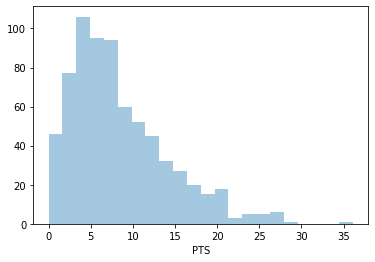

In [14]:
sns.distplot(df.PTS, 
             kde=False)

Change bar line color

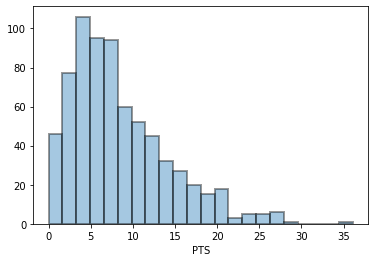

In [15]:
sns.distplot(df.PTS, 
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2))

Change bar fill colors

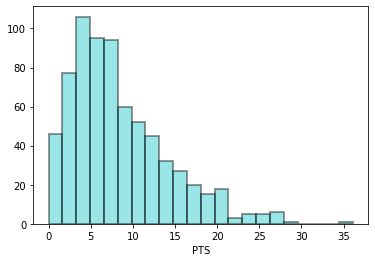

In [16]:
sns.distplot(df.PTS,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')